In [25]:
import cv2 as cv,numpy as np,pandas as pd
import seaborn as sns,matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [2]:
imgs = glob("/media/catila/a5ee59fd-ca0b-4ee4-bc60-0a51e7ec42bd/akhil/lawns_buildings/clipped_tifs"+"/*tif")

In [5]:
len(imgs)

3442

In [4]:
cv.imread(imgs[0]).shape

(607, 309, 3)

In [21]:
i=cv.imread("/media/catila/a5ee59fd-ca0b-4ee4-bc60-0a51e7ec42bd/akhil/lawns_buildings/clipped_tifs/16.tif")
np.where(i==0)[1].shape,i.shape

((539835,), (715, 305, 3))

In [23]:
(np.where(i==0)[1].shape[0]/3)/(i.shape[0]*i.shape[1])

0.8251518972830448

In [26]:
shps = []
blckPercntg = []
for img in tqdm(imgs):
    img = cv.imread(img)
    shps.append(img.shape)
    blckCnt = np.where(img==0)[0].shape[0]/3
    ttlPxls = img.shape[0]*img.shape[1]
    blckPercntg.append(100*(blckCnt/ttlPxls))

100%|██████████| 3442/3442 [03:16<00:00, 17.50it/s]


In [14]:
df = pd.DataFrame(np.vstack(shps))
df.head()

0     1  2
0   607   309  3
1   574   267  3
2  1447  1928  3
3   531   209  3
4   223   562  3

In [17]:
df['ar'] = df[1]/df[0]

In [28]:
np.percentile(blckPercntg,[0,25,50,75,80,90,100])

array([ 0.        ,  4.08175492, 29.5887936 , 49.21630588, 52.03324596,
       57.25343342, 99.99990419])

In [20]:
df.describe(percentiles=[0.25,0.50,0.75,0.80,0.90])

0            1       2           ar
count  3442.000000  3442.000000  3442.0  3442.000000
mean    743.060139   881.367809     3.0     1.431242
std     384.641593   459.194993     0.0     0.975823
min     122.000000   177.000000     3.0     0.158021
25%     533.000000   566.000000     3.0     0.720399
50%     695.000000   819.000000     3.0     1.158921
75%     865.000000  1064.750000     3.0     1.852928
80%     926.800000  1157.800000     3.0     2.115162
90%    1146.600000  1417.900000     3.0     2.729138
max    5666.000000  5847.000000     3.0     8.012195

In [32]:
1024*0.65,660/1024

(665.6, 0.64453125)

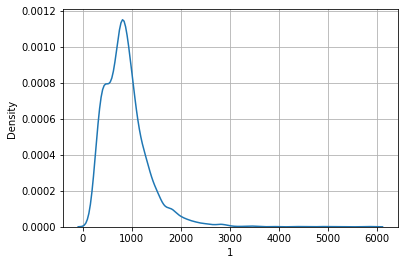

In [28]:
sns.kdeplot(df[1]);
plt.grid()

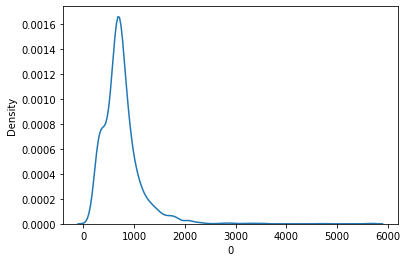

In [26]:
sns.kdeplot(df[0]);